<a href="https://colab.research.google.com/github/boangri/neuraluniversity/blob/master/HW03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к занятию №3 "Сверточные сети" 9.08.2020

Борис Грибовский <xinu@yandex.ru>

## LIGHT Вариант 1
Переписать ноутбук по распознаванию рукописных цифр своими руками

In [ ]:
# 1. Импорт библиотек
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 2. Загрузка базы mnist.
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 3. Нормирование и преобразование x_train и y_train.
x_train = x_train0[..., None] # добавляем размерность
x_test = x_test0[..., None]
y_train = utils.to_categorical(y_train0, 10)
y_test = utils.to_categorical(y_test0, 10)

In [ ]:
# 4. Создание сверточной нейронной сети.
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_10 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

In [ ]:
# 5. Обучение сверточной нейронной сети.
history = model.fit(x_train, y_train, batch_size=128, epochs=15, validation_data=(x_test, y_test), verbose=1)

Epoch 1/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1474 - accuracy: 0.9536 - val_loss: 0.0464 - val_accuracy: 0.9850
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 0.0335 - val_accuracy: 0.9894
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0290 - accuracy: 0.9906 - val_loss: 0.0357 - val_accuracy: 0.9883
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0328 - val_accuracy: 0.9885
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0360 - val_accuracy: 0.9881
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0361 - val_accuracy: 0.9882
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0093 - accuracy: 0.9968 - val_loss: 0.0569 - val_accuracy: 0.9856
Epoch 

In [ ]:
# Функция для построения графиков истории обучения
def visualizeHistory(history, figsize=(12,5)):
  # Точность
  plt.figure(figsize=figsize)
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.title('Доля верных ответов')
  plt.legend()
  # Ошибки
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
  plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Ошибка')
  plt.title('Ошибка')
  plt.legend()
  plt.show()

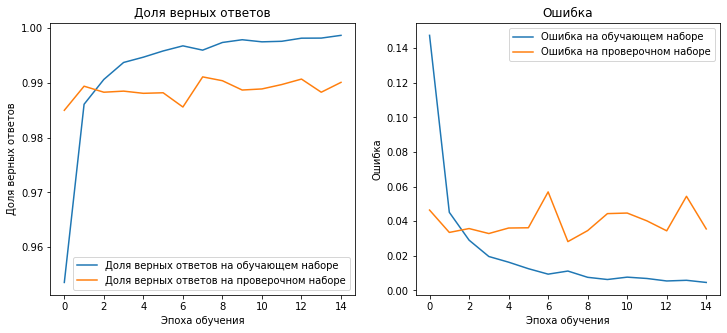

In [ ]:
visualizeHistory(history)

## LIGHT Вариант 2
Провести серию экспериментов по подбору гиперпараметров нейронной сети, созданной на занятии.

In [ ]:
%%time
epochs=15
# Перебираем все комбинации гиперпараметров, собираем данные в таблицу.
filters = (2, 4, 16, 32)
activations = (None, 'relu', 'sigmoid') # добавил сигмоиду
batch_sizes = (10, 100, 1000, 10000) # заменил 48000 на 1000 и 10000 (комбинация 32 фильтра и батч 48000 вызывала аут ов мемори)
results = np.zeros((len(activations), len(filters), len(batch_sizes)))
for i, act_func in enumerate(activations):
  for j, filter_number in enumerate(filters):
    for k, batch_size in enumerate(batch_sizes):
      print('Number of filters: %d, batch_size: %d, activation: %s' % (filter_number, batch_size, act_func))
      model = Sequential()
      model.add(BatchNormalization(input_shape=(28, 28, 1)))
      model.add(Conv2D(filter_number, 3, padding='same', activation=act_func))
      model.add(Conv2D(filter_number, 3, padding='same', activation=act_func))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))
      model.add(Flatten())
      model.add(Dense(256, activation=act_func))
      model.add(Dense(10, activation='softmax'))
      model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
      history = model.fit(x_train[:48000], y_train[:48000], batch_size=batch_size, epochs=epochs, verbose=0)
      scores = model.evaluate(x_test, y_test, verbose=1)
      print(scores)
      print("Доля верных ответов на тестовых данных, в процентах: %.2f%%" % (scores[1] * 100))
      results[i][j][k] = scores[1] * 100

Number of filters: 2, batch_size: 10, activation: None
313/313 [==============================] - 1s 2ms/step - loss: 0.1605 - accuracy: 0.9526
[0.1604791134595871, 0.9526000022888184]
Доля верных ответов на тестовых данных, в процентах: 95.26%
Number of filters: 2, batch_size: 100, activation: None
313/313 [==============================] - 1s 2ms/step - loss: 0.1498 - accuracy: 0.9566
[0.14979401230812073, 0.95660001039505]
Доля верных ответов на тестовых данных, в процентах: 95.66%
Number of filters: 2, batch_size: 1000, activation: None
313/313 [==============================] - 1s 2ms/step - loss: 0.1791 - accuracy: 0.9480
[0.1790757179260254, 0.9480000138282776]
Доля верных ответов на тестовых данных, в процентах: 94.80%
Number of filters: 2, batch_size: 10000, activation: None
313/313 [==============================] - 1s 2ms/step - loss: 0.4450 - accuracy: 0.8726
[0.4449564814567566, 0.8726000189781189]
Доля верных ответов на тестовых данных, в процентах: 87.26%
Number of filte

In [ ]:
# Вывод таблиц
import pandas as pd
df0 = pd.DataFrame(results[0], columns=batch_sizes, index=filters)
df1 = pd.DataFrame(results[1], columns=batch_sizes, index=filters)
df2 = pd.DataFrame(results[2], columns=batch_sizes, index=filters)

In [ ]:
# Процент правильных ответов на тестовой выборке в зависимости от числа фильтров и размера батча
# Активация 'linear' 
df0

,10,100,1000,10000
2,95.260000,95.660001,94.800001,87.260002
4,97.140002,97.039998,96.880001,89.440000
16,97.700000,97.799999,98.019999,90.549999
32,97.289997,97.860003,97.860003,92.439997


In [ ]:
# Активация ReLU
df1

,10,100,1000,10000
2,98.329997,98.570001,96.689999,92.409998
4,98.680001,98.890001,98.689997,93.540001
16,98.960000,98.930001,98.869997,97.160000
32,98.960000,99.150002,99.019998,97.890002


In [ ]:
# Активация sigmoid
df2

,10,100,1000,10000
2,97.930002,97.030002,91.299999,54.430002
4,98.809999,97.880000,93.599999,78.450000
16,98.879999,98.769999,96.509999,79.680002
32,98.890001,98.890001,96.439999,16.290000


**ВЫВОДЫ**

Я немного изменил программу тестирования - заменил батч-сайз 48000 на варианты 1000 и 10000. Батч-сайз 48000 плох тем, что он дает очень слабые результаты и к тому же вариант с 32 фильтрами не влазил в память. Еще я добавил активацию sigmoid. 

1. Наилучший результат получен на комбинации 32 фильтра, батч 100, ReLU - 99.15%
1. Активация ReLU работает лучше остальных.
2. Батч сайз не болжен быть слишком большим - падает точность, проблемы с памятью - батч не умещается в памяти. Оптимальный размер батча - много больше 1 но много меньше размера базы. Лучшие результаты получились на размерах 10 и 100.
1. Увеличение числа фильтров улучшает точность, но замедляет обучение.
1. Аномально низкий - 16% - результат получен с сигмоидой и большим (10000) батчем. Думаю это связано с малым количеством итераций градиентного спуска (из-за большого батча) и эффектом затухания градиента у сигмоиды (производная сигмоиды мала при больших значениях аргумента). 






## PRO Вариант 1

Провести ряд экспериментов с архитектурой нейронных сетей.
1. Исследовать влияние количества слоев conv2_d.
2. Исследовать влияние количества нейронов.
3. Исследовать влияние MaxPooling2D в сети.
4. Исследовать влияние Dropout.
5. Написать выводы по результатам проведенных тестов.


Попробую совместить эксперименты с поиском решения для варианта 2.

In [ ]:
#Загружаем cifar10
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
import pandas as pd
import numpy as np

In [ ]:
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

In [ ]:
#Превращаем y_train и y_test сетей в формат one hot encoding
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)

In [ ]:
print(x_train10.shape)
print(x_test10.shape)
print(y_train10.shape)
print(y_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


Наша экспериментальная сеть состоит из 3-х каскадов, каждый каскад сжимает размер картинки вдвое - 32 - 16 - 8 - 4, поэтому число каскадов практически фиксировано, но внутри каскада можно варьировать 1. число фильтров; 2. число сверточных слоев.

In [ ]:
random.seed(3)
np.random.seed(42)
#задаём batch_size
batch_size = 128 
epochs = 20

In [ ]:
%%time
# перебираем все комбинации гиперпараметров - число фильтров в слое и число слоев.
n_filters = (16, 32, 64)
n_layers = (1, 2, 3)
results = np.zeros((len(n_filters), len(n_layers)))
for i, nf in enumerate(n_filters):
  for j, nl in enumerate(n_layers):
    model = Sequential()

    model.add(BatchNormalization(input_shape=(32, 32, 3)))
    for n in range(nl):
      model.add(Conv2D(nf, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())
    for n in range(nl):
      model.add(Conv2D(2*nf, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())
    for n in range(nl):
      model.add(Conv2D(4*nf, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    print("FILTERS: %d LAYERS: %d" % (nf, nl))
    model.summary()
    history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=0)
    scores = model.evaluate(x_test10, y_test10, verbose=1)
    print(scores)
    print("Доля верных ответов на тестовых данных, в процентах: %.2f%%" % (scores[1] * 100))
    results[i][j] = scores[1] * 100

FILTERS: 16 LAYERS: 1
Model: "sequential_139"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_223 (Bat (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_443 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_223 (MaxPoolin (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_265 (Dropout)        (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization_224 (Bat (None, 16, 16, 16)        64        
_________________________________________________________________
conv2d_444 (Conv2D)          (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_224 (MaxPoolin (

In [ ]:
df = pd.DataFrame(results, columns=n_layers, index=n_filters)
df

,1,2,3
16,77.679998,80.360001,79.909998
32,80.830002,82.340002,81.379998
64,80.860001,83.819997,84.230000


**Промежуточные выводы**

точность растет с увеличением числа сверточных слоев в каскаде и числа фильтров. Так что выбираем путь тупого наращивания размера сети. А еще делаем сеть архитектурно похожей на VGG16 (с учетом различия размерности входящего изображения)

In [ ]:
%%time
#Обучаем сеть на данных cifar10
epochs = 20
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

Epoch 1/20
391/391 [==============================] - 5s 13ms/step - loss: 1.6730 - accuracy: 0.4129 - val_loss: 1.3626 - val_accuracy: 0.5213
Epoch 2/20
391/391 [==============================] - 5s 12ms/step - loss: 1.1992 - accuracy: 0.5688 - val_loss: 1.0183 - val_accuracy: 0.6390
Epoch 3/20
391/391 [==============================] - 5s 13ms/step - loss: 1.0206 - accuracy: 0.6402 - val_loss: 0.8229 - val_accuracy: 0.7116
Epoch 4/20
391/391 [==============================] - 5s 13ms/step - loss: 0.9063 - accuracy: 0.6824 - val_loss: 0.7570 - val_accuracy: 0.7395
Epoch 5/20
391/391 [==============================] - 5s 13ms/step - loss: 0.8241 - accuracy: 0.7121 - val_loss: 0.7030 - val_accuracy: 0.7571
Epoch 6/20
391/391 [==============================] - 5s 13ms/step - loss: 0.7587 - accuracy: 0.7376 - val_loss: 0.7356 - val_accuracy: 0.7454
Epoch 7/20
391/391 [==============================] - 5s 13ms/step - loss: 0.7007 - accuracy: 0.7563 - val_loss: 0.6809 - val_accuracy: 0.7648

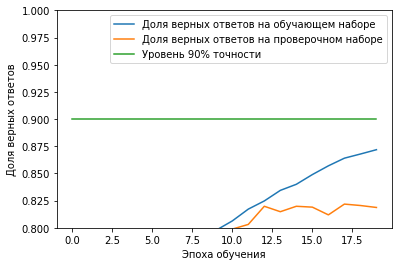

In [ ]:
#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.plot([0, epochs - 1], [0.9]*2, label='Уровень 90% точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.ylim(0.8, 1.0)
plt.legend()
plt.show()

**Исследуем влияние дропаутов.**
 
Для этого назначим в качестве валидационной выборки саму тренировочную. При отсутствии дропаутов точность на тренировочной и на валидационной должны совпадать (т.к. это одна и та же выборка) При включении дропаутов точность на тренировочной выборке должна уменьшиться по сравнению с валидационной.

In [ ]:
# модель для изучения влияния дропаутов. Увеличены вероятности дропаутов для
# более выраженного эффекта.
model = Sequential()

model.add(BatchNormalization(input_shape=(32, 32, 3)))  # 32x32

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))  # 16x16

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))  # 8x8

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))  # 4x4

model.add(Flatten())

model.add(Dense(1024))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_7 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 32, 32, 256)       7168      
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 32, 32, 256)       590080    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 512)       1180160   
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 16, 16, 512)      

In [ ]:
#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_data=(x_train10, y_train10),
                    verbose=1)

Epoch 1/20
391/391 [==============================] - 72s 184ms/step - loss: 1.4949 - accuracy: 0.4532 - val_loss: 1.2212 - val_accuracy: 0.5618
Epoch 2/20
391/391 [==============================] - 71s 182ms/step - loss: 1.1384 - accuracy: 0.5938 - val_loss: 0.9471 - val_accuracy: 0.6662
Epoch 3/20
391/391 [==============================] - 71s 183ms/step - loss: 0.9101 - accuracy: 0.6783 - val_loss: 0.7199 - val_accuracy: 0.7513
Epoch 4/20
391/391 [==============================] - 71s 182ms/step - loss: 0.7699 - accuracy: 0.7302 - val_loss: 0.6155 - val_accuracy: 0.7861
Epoch 5/20
391/391 [==============================] - 72s 183ms/step - loss: 0.6763 - accuracy: 0.7627 - val_loss: 0.5173 - val_accuracy: 0.8222
Epoch 6/20
391/391 [==============================] - 71s 183ms/step - loss: 0.6063 - accuracy: 0.7892 - val_loss: 0.4594 - val_accuracy: 0.8411
Epoch 7/20
391/391 [==============================] - 71s 182ms/step - loss: 0.5475 - accuracy: 0.8104 - val_loss: 0.4319 - val_ac

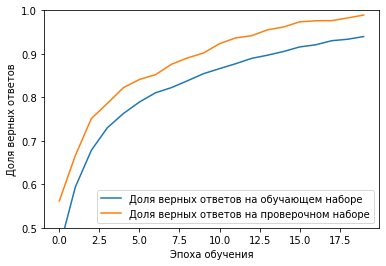

In [ ]:
# Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.ylim(0.5, 1.0)
plt.legend()
plt.show()

На графике видно влияние дропаутов. Без дропаутов сеть быстро переобучается (как на желтой линии)

**ВЫВОДЫ**

1. Количество каскадов сверточных слоев Conv2D определяется в значительной мере размерами изображения. Одна из задач каскада - уменьшить размер изображения. Так что чем больше изображение, тем больше может потребоваться каскадов.
2. В одном каскаде можно применить 1-3 сверточных слоя (не уменьшающих размерность изображения) и предвыборку, уменьшающую размер картинки вдвое (а иногда и более).
2. Под количеством нейронов вероятно понимается количество фильтров в слое. Увеличение числа фильтров повышает способность сети к выделению различных признаков и в целом повышает качество классификаци. 
1. Основная задача подвыбоки (MaxPooling2D) - снижение размерности изображения (обычно в 2 раза) Эти слои обычно чередуют со сверточными слоями.
2. Дропаут-слои нужны для регуляризации, т.е. для борьбы с переобучением. Они мешают тупому запоминанию пикселов.

## PRO Вариант 2

Добейтесь точности 90% на проверочной выборке на базе Cifar10. Размер проверочной выборки - 20%.


In [ ]:
#Загружаем cifar10
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 

In [ ]:
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
x_train10.shape

(50000, 32, 32, 3)

In [ ]:
x_test10.shape

(10000, 32, 32, 3)

In [ ]:
#Определяем названия классов по порядку
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

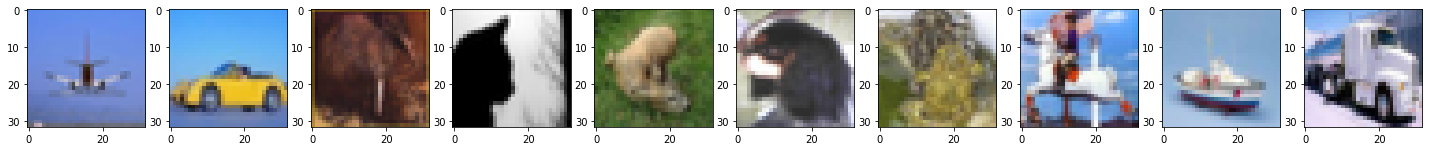

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train10==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_train10[index] #Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img)) #Отображаем изображение i-ым графиков

plt.show() #Показываем изображения

In [ ]:
#Превращаем y_train и y_test сетей в формат one hot encoding
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)
x_train10 = x_train10.astype('float32')
x_test10 = x_test10.astype('float32')
x_train10 /= 255
x_test10 /= 255

In [ ]:
# Посмотрим размеры выборок перед обучением
print(x_train10.shape)
print(x_test10.shape)
print(y_train10.shape)
print(y_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [ ]:
# зафиксируем сиды для воспроизводимости результатов.
random.seed(3)
np.random.seed(42)
#задаём batch_size
batch_size = 128 
epochs = 40

In [ ]:
model = Sequential()

model.add(BatchNormalization(input_shape=(32, 32, 3)))  # 32x32

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))  # 16x16

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # 8x8

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))  # 4x4

model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 256)       7168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 256)       0

In [ ]:
%%time
epochs=44
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(x_train10, y_train10, batch_size=64)
steps = int(x_train10.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(x_test10, y_test10), verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/44
781/781 [==============================] - 99s 127ms/step - loss: 2.0041 - accuracy: 0.3948 - val_loss: 1.3195 - val_accuracy: 0.5371
Epoch 2/44
781/781 [==============================] - 98s 125ms/step - loss: 1.4087 - accuracy: 0.5411 - val_loss: 1.1409 - val_accuracy: 0.6219
Epoch 3/44
781/781 [==============================] - 98s 125ms/step - loss: 1.1667 - accuracy: 0.6185 - val_loss: 0.9209 - val_accuracy: 0.6972
Epoch 4/44
781/781 [==============================] - 97s 125ms/step - loss: 1.0052 - accuracy: 0.6646 - val_loss: 0.7971 - val_accuracy: 0.7326
Epoch 5/44
781/781 [==============================] - 97s 125ms/step - loss: 0.8821 - accuracy: 0.7086 - val_loss: 0.7364 - val_accuracy: 0.7629
Epoch 6/44
781/781 [==============================] - 97s 125ms/step - loss: 0.7893 - accuracy: 0.7373 - val_loss: 0.7012 - val_accuracy: 0.7724
Epoch 7/44
781/781 [==============================] - 

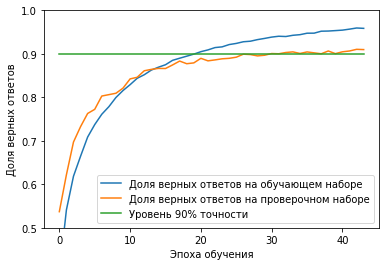

In [ ]:
#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.plot([0, epochs - 1], [0.9]*2, label='Уровень 90% точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.ylim(0.5, 1.0)
plt.legend()
plt.show()

**ВЫВОД** Достигнут уровень точности 91%

Такой результат был получен в результате совместного использования аугментации, батч-нормализации, дропаутов с нарастающими значениями.

## PRO Вариант 3

Добейтесь точности не менее 90% на проверочной выборке на базе трех иномарок. Размер проверочной выборки - 20%.



In [ ]:

from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from PIL import Image # Для отрисовки изображений
import random # Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями

In [ ]:
!wget https://xland.ru/uai/hw03/cars.zip

--2020-08-13 06:13:42--  https://xland.ru/uai/hw03/cars.zip
Resolving xland.ru (xland.ru)... 198.211.125.59
Connecting to xland.ru (xland.ru)|198.211.125.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119051802 (114M) [application/zip]
Saving to: ‘cars.zip’

cars.zip            100%[===================>] 113.54M  10.7MB/s    in 12s     

2020-08-13 06:13:56 (9.13 MB/s) - ‘cars.zip’ saved [119051802/119051802]



In [ ]:
!unzip cars.zip

In [ ]:
train_path = 'cars' # Папка с папками картинок, рассортированных по категориям
val_path = 'cars' # Для валидации 
# val_path = 'drive/My Drive/Автомобили/val' # Для валидации 
batch_size = 25 # Размер выборки
img_width = 192 # Ширина изображения
img_height = 108 # Высота изображения

In [ ]:
#Генератор изображений
datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=10, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.1, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.1, #Зумируем изображения при генерации выборки
    horizontal_flip=True, #Отключаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
    validation_split=.2 #Указываем разделение изображений на обучающую и тестовую выборку
)


In [ ]:
# обучающая выборка
train_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_height, img_width), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='training' # устанавливаем как набор для обучения
)

# проверочная выборка
validation_generator = datagen.flow_from_directory(
    val_path, #Путь ко всей выборке выборке
    target_size=(img_height, img_width), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='validation' # устанавливаем как валидационный набор
)

Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.


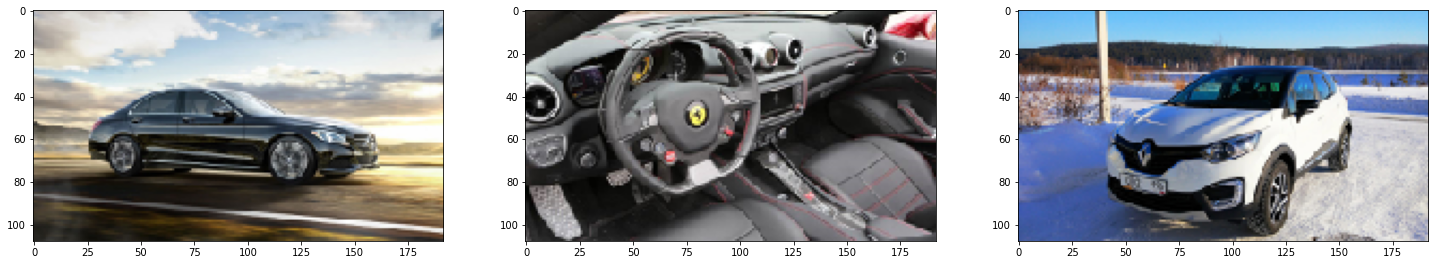

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 3, figsize=(25, 5)) #Создаем полотно из 3 графиков
for i in range(3): #Проходим по всем классам
  car_path = train_path + '/' + os.listdir(train_path)[i] + '/'#Формируем путь к выборке
  img_path = car_path + random.choice(os.listdir(car_path)) #Выбираем случайное фото для отображения
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) #Отображение фотографии

plt.show() #Показываем изображения

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  # 96х54
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  # 48x27
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  # 16x9
model.add(Dropout(0.4))
 
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  #8x5
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(len(train_generator.class_indices), activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 108, 192, 256)     7168      
_________________________________________________________________
batch_normalization (BatchNo (None, 108, 192, 256)     1024      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 192, 256)     590080    
_________________________________________________________________
batch_normalization_1 (Batch (None, 108, 192, 256)     1024      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 54, 96, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 54, 96, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 96, 256)       5

In [ ]:
%%time
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=100,
    verbose=1
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
109/109 [==============================] - 53s 484ms/step - loss: 1.5459 - accuracy: 0.4853 - val_loss: 2.2631 - val_accuracy: 0.3378
Epoch 2/100
109/109 [==============================] - 51s 471ms/step - loss: 1.3183 - accuracy: 0.5250 - val_loss: 3.6526 - val_accuracy: 0.3393
Epoch 3/100
109/109 [==============================] - 52s 480ms/step - loss: 1.2310 - accuracy: 0.5394 - val_loss: 4.1023 - val_accuracy: 0.3422
Epoch 4/100
109/109 [==============================] - 53s 486ms/step - loss: 1.1293 - accuracy: 0.5478 - val_loss: 3.2764 - val_accuracy: 0.3511
Epoch 5/100
109/109 [==============================] - 53s 489ms/step - loss: 1.0313 - accuracy: 0.5839 - val_loss: 1.7598 - val_accuracy: 0.3807
Epoch 6/100
109/109 [==============================] - 54s 492ms/step - loss: 1.0425 - accuracy: 0.5857 - val_loss: 1.6927 - val_accuracy: 0.4059
Epoch 7/100
109/109 [===========================

In [ ]:
# Отображаем график точности обучения
fig = plt.figure()
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.plot([0, 99], [0.9]*2, label='Уровень 90% точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()
fig.savefig('1.png')

**ВЫВОД** Получена точность 83%. Мне не удалось достичь заданной точности несмотря на многочисленные попытки. Я применял те же самые методы, что позволили добиться 91% на цифаре-10, но в данном случае их оказалось недостаточно. 

Не уверен, что уровень точности 90% достижим в принципе на картинках такого разрешения. На них даже человеку иногда сложно определить марку.

## ULTRA PRO

Вариант 1
Подберите собственную базу изображений и разделите ее на классы для классификации. Подберите архитектуру сверточной нейронной сети и добейтесь точности классификации данных Вашей базы не менее 85% на проверочной выборке.



Представляем: cats vs dogs - классика жанра

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import random
import pickle

In [ ]:
!wget https://xland.ru/uai/hw03/catsdogs.zip
!unzip catsdogs.zip

In [ ]:
DATADIR = "PetImages"
CATEGORIES = ["Dog", "Cat"]

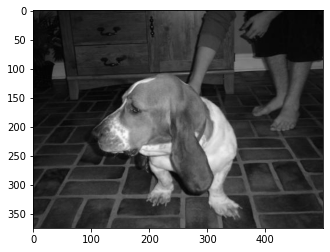

In [ ]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  
        plt.show()  
        break  # покажем только одну
    break

In [ ]:
img_array.shape

(375, 500)

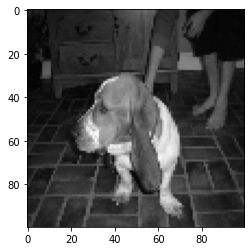

In [ ]:
# приведем все картинки к одному размеру 100х100 (разумный компромисс качество-размер)
IMG_SIZE = 100 

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES: 
        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:
                pass
create_training_data()
random.shuffle(training_data)
print(len(training_data))

100%|██████████| 12486/12486 [00:15<00:00, 796.88it/s]

24916


In [ ]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
X.shape

(24916, 100, 100, 1)

In [ ]:
# Сохраним подготовленные данные для последующей быстрой загрузки
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
# Альтернативный способ загрузить данные (из предварительно сохраненных данных)
# !wget https://xland.ru/uai/hw03/X.pickle
# !wget https://xland.ru/uai/hw03/y.pickle

In [ ]:
# Альтернативный способ загрузить данные (продолжение)
# pickle_in = open("X.pickle","rb")
# X = pickle.load(pickle_in)

# pickle_in = open("y.pickle","rb")
# y = pickle.load(pickle_in)

In [ ]:
# Нормирование и преобразование в float32
X = X / 255.
y = np.array(y, dtype=np.float32)

In [ ]:
model = Sequential()

model.add(BatchNormalization(input_shape=(X.shape[1:])))  # 100x100

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # 50x50

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # 25x25

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # 12x12

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # 6x6

model.add(Flatten())

model.add(Dense(1024))
model.add(Dropout(0.25))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 100, 100, 1)       4         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 100, 100, 256)     2560      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 256)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 50, 50, 256)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 256)       590080    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 256)       0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 25, 25, 256)      

In [ ]:
epochs = 15

In [ ]:
%%time
history = model.fit(X, y, batch_size=128, epochs=epochs, validation_split=0.3)

Epoch 1/15
137/137 [==============================] - 89s 649ms/step - loss: 0.5620 - accuracy: 0.7078 - val_loss: 0.5087 - val_accuracy: 0.7472
Epoch 2/15
137/137 [==============================] - 88s 644ms/step - loss: 0.5090 - accuracy: 0.7513 - val_loss: 0.4746 - val_accuracy: 0.7779
Epoch 3/15
137/137 [==============================] - 88s 644ms/step - loss: 0.4741 - accuracy: 0.7748 - val_loss: 0.5047 - val_accuracy: 0.7608
Epoch 4/15
137/137 [==============================] - 88s 644ms/step - loss: 0.4363 - accuracy: 0.7991 - val_loss: 0.4068 - val_accuracy: 0.8148
Epoch 5/15
137/137 [==============================] - 88s 644ms/step - loss: 0.4045 - accuracy: 0.8164 - val_loss: 0.3826 - val_accuracy: 0.8290
Epoch 6/15
137/137 [==============================] - 88s 644ms/step - loss: 0.3705 - accuracy: 0.8306 - val_loss: 0.3405 - val_accuracy: 0.8463
Epoch 7/15
137/137 [==============================] - 88s 643ms/step - loss: 0.3428 - accuracy: 0.8489 - val_loss: 0.3265 - val_ac

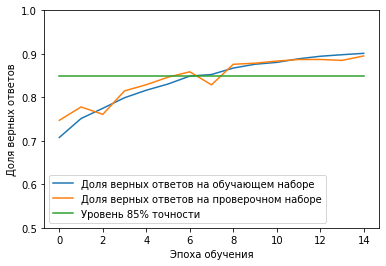

In [ ]:
# Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.plot([0, epochs - 1], [0.85]*2, label='Уровень 85% точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.ylim(0.5, 1.0)
plt.legend()
plt.show()

**ВЫВОД** Достигнута точность 89% всего на 15 эпохах, превышен заданный уровень точности - 85%. Остается потенциал для дальнейшего роста точности с увеличением числа эпох.

БОНУС: Альтернативное решение той же задачи с помощью предобученной сети VGG16
https://colab.research.google.com/drive/124YSf7ppJSJJpoV6VMFe4o-iKc-EE__3?usp=sharing

Я адаптировал решение под свой датасет, разобрался в работе.